# The effect on noise on motion detector measurements

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

from matplotlib import rc
matplotlib.rcParams['figure.figsize'] = (12, 10)
matplotlib.rcParams['axes.labelsize'] = 20
matplotlib.rcParams['font.size'] = 16

## Let's define a nice smooth function of position vs time

What I'm using is
$$
x(t) = 10 + \frac{1}{2}2t^2
$$
because, why not...

In [2]:
def x(t): return 10 + .5 * 2*t**2

T = np.linspace(0, 5, 21)
df = pd.DataFrame([x(t) for t in T], T, ["x"])
df

,x
0.00,10.0000
0.25,10.0625
0.50,10.2500
0.75,10.5625
1.00,11.0000
1.25,11.5625
1.50,12.2500
1.75,13.0625
2.00,14.0000
2.25,15.0625


### Plot of the smooth function

Looks smooth, indeed..

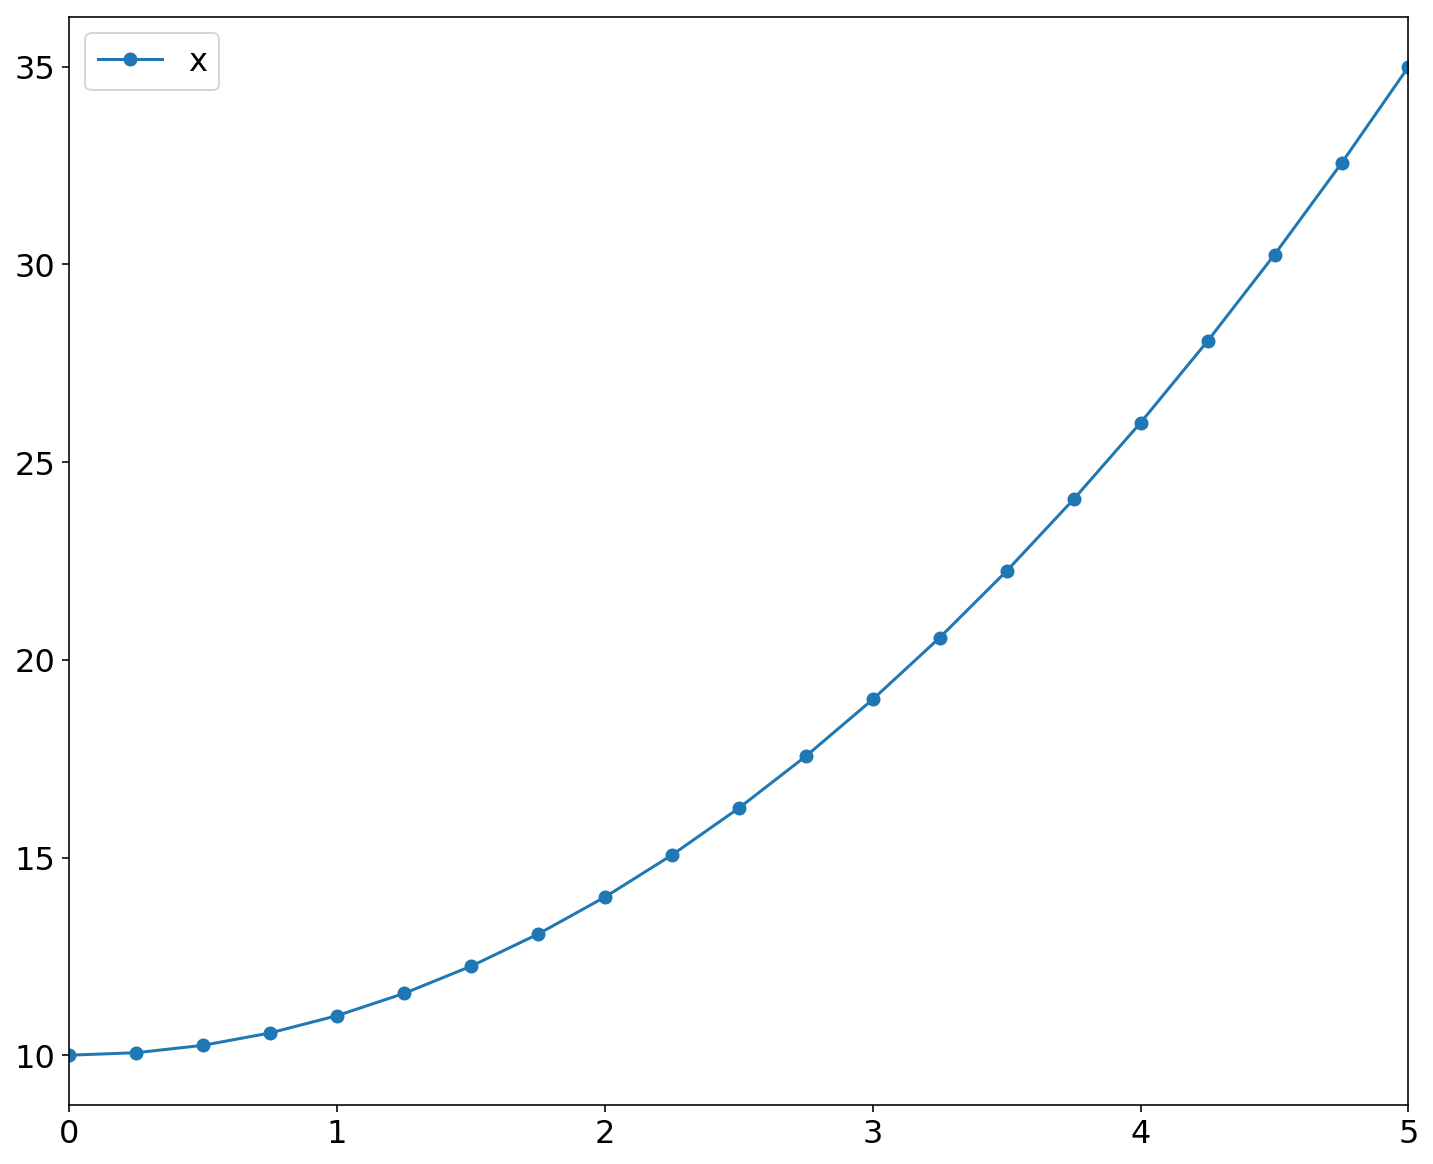

In [3]:
df.plot(marker="o");

### Add some noise and plot the slightly noisy data

One can play with different levels of noise. A level of $\pm 1\times 10^{-2}$ is rather small compared to the smooth original values of order $10$. So small that on the plot one cannot distinguish the noisy from the original data

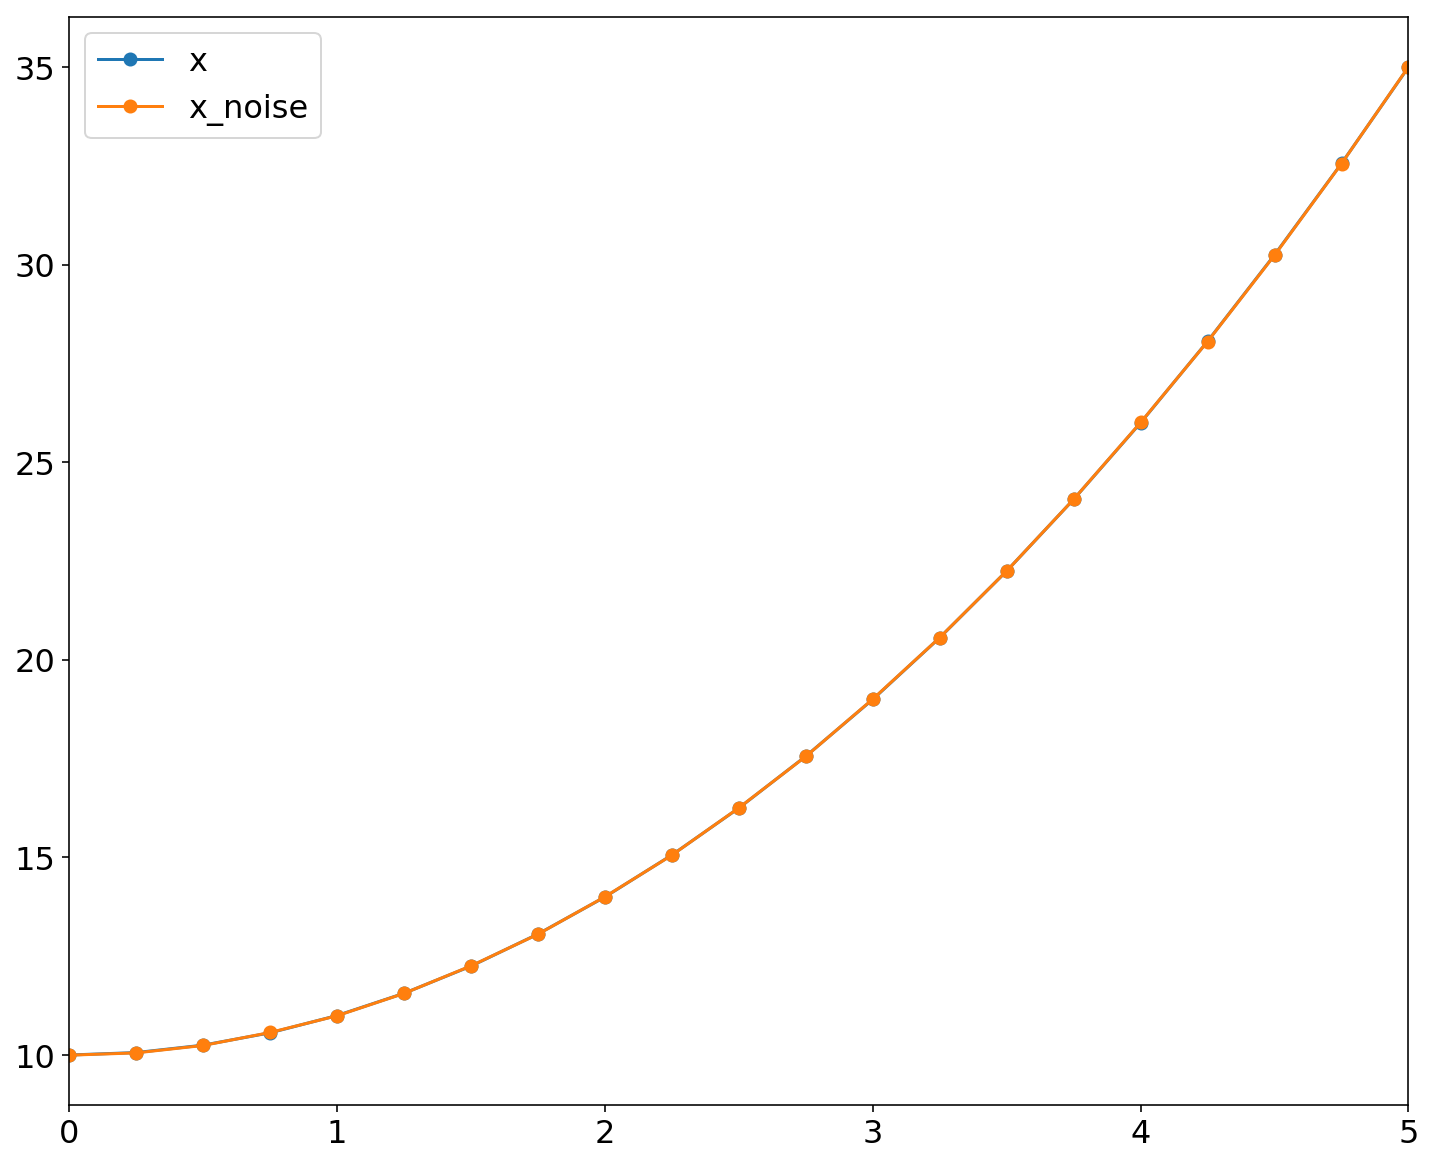

In [4]:
df["x_noise"] = df["x"] + 1e-2*(2*np.random.rand(len(df)) - 1.)
df.plot(marker="o");

### Plot approximate velocity calculated from the original and noisy data, respectively

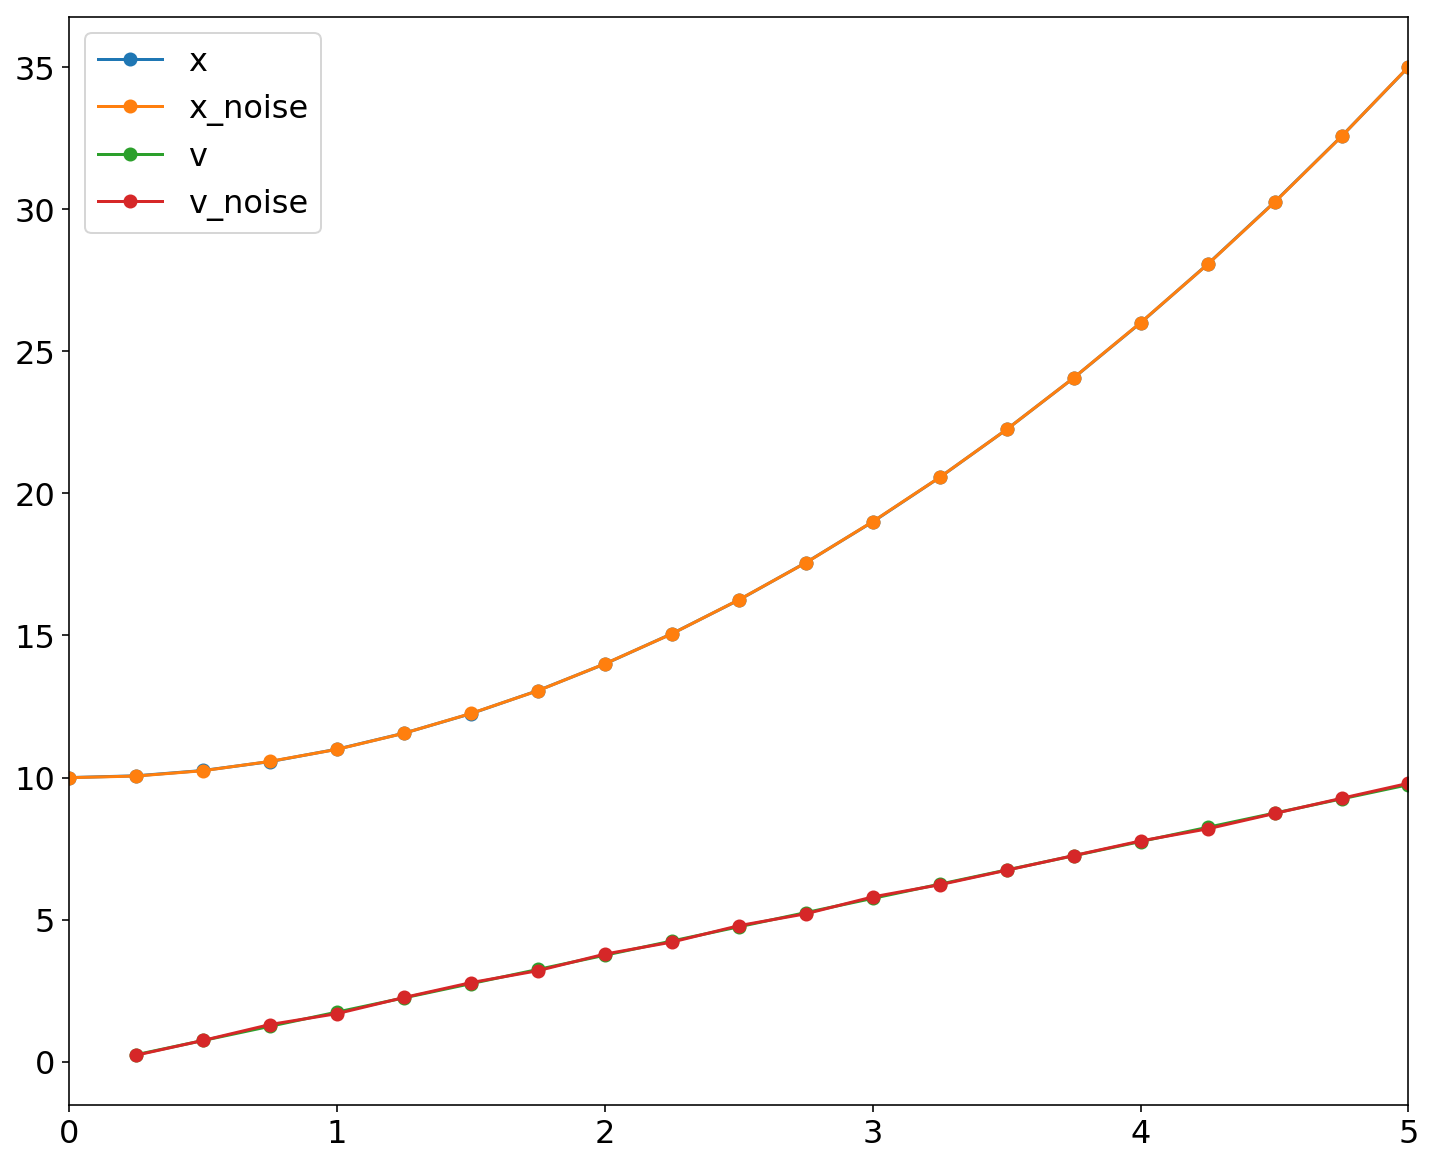

In [5]:
df["v"] = df.diff()["x"] / (df.index[1] - df.index[0])
df["v_noise"] = df.diff()["x_noise"] / (df.index[1] - df.index[0])
df.plot(marker="o")

### Plot approximate acceleration calculated from the original and noisy data, respectively


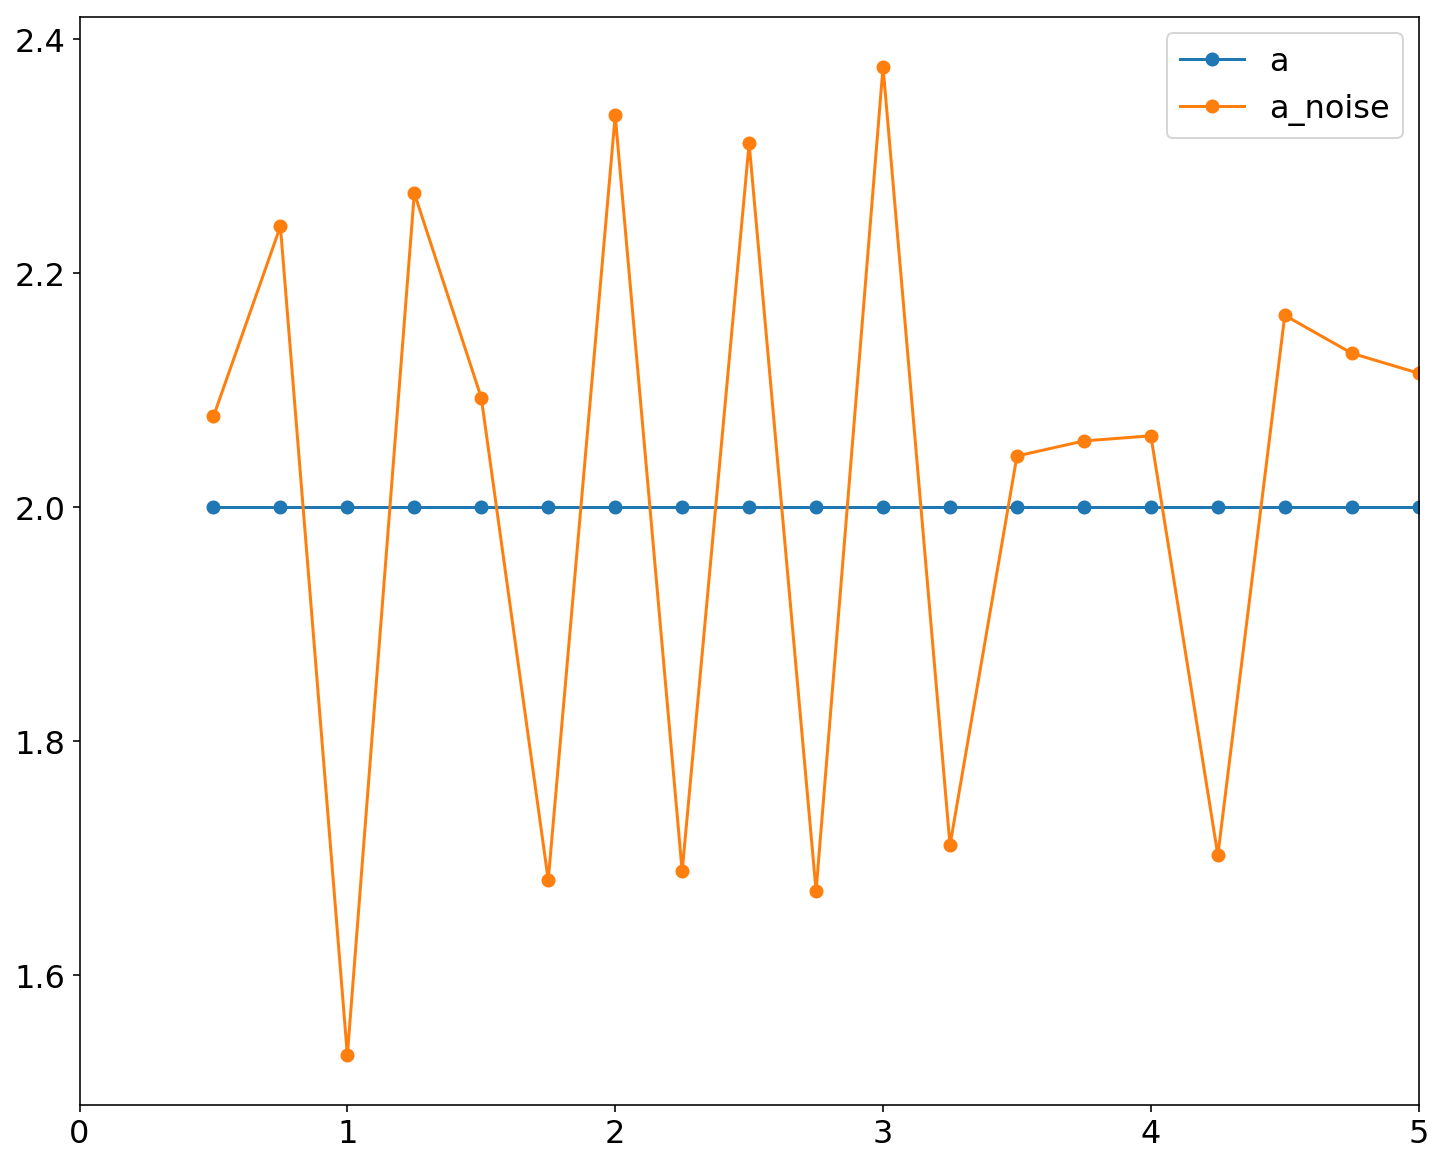

In [6]:
df["a"] = df.diff()["v"] / (df.index[1] - df.index[0])
df["a_noise"] = df.diff()["v_noise"] / (df.index[1] - df.index[0])
df[["a", "a_noise"]].plot(marker="o")